In [1]:
from scheduling_upm.utils.environment import generate_environment
from scheduling_upm.utils.evaluation import compute_base_milestones, apply_resource_constraint, precedence_constraint, compute_makespan
from scheduling_upm.whales_optim import WhaleOptimizationAlgorithm
from scheduling_upm.simulated_annealing import SimulatedAnnealing
from scheduling_upm.hybrid_woa_sa import Hybrid

environment = generate_environment(n_tasks=10, n_machines=4, seed=2503)

n_machines = environment.pop("n_machines", 20)
n_tasks = environment.pop("n_tasks", 20)
tasks = environment.pop("tasks", None)
setups = environment.pop("setups", {})
total_resource = environment.pop("total_resource", None)
precedences = environment.pop("precedences", None)
energy_constraint = environment.pop("energy_constraint", None)

In [2]:
sa_solution, sa_history = SimulatedAnnealing(
    tasks=tasks,
    setups=setups,
    n_machines=n_machines,
    precedences=precedences,
    energy_constraint=energy_constraint,
    total_resource=total_resource,
    n_iterations=int(1e3),
).optimize()

sa_schedule, sa_cost = sa_solution.schedule, sa_solution.cost
print(sa_cost)
for machine, seq in sa_schedule.items():
    print(f"{machine}: {seq}")

{'total_cost': 61.94697049643756, 'makespan': 88, 'precedence_penalty': 0, 'std_dev': 17.946970496437554, 'energy_exceeds': 0.0}
{'total_cost': 61.94697049643756, 'makespan': 88, 'precedence_penalty': 0, 'std_dev': 17.946970496437554, 'energy_exceeds': 0.0}
{'total_cost': 61.94697049643756, 'makespan': 88, 'precedence_penalty': 0, 'std_dev': 17.946970496437554, 'energy_exceeds': 0.0}
{'total_cost': 61.94697049643756, 'makespan': 88, 'precedence_penalty': 0, 'std_dev': 17.946970496437554, 'energy_exceeds': 0.0}
{'total_cost': 61.94697049643756, 'makespan': 88, 'precedence_penalty': 0, 'std_dev': 17.946970496437554, 'energy_exceeds': 0.0}
{'total_cost': 61.94697049643756, 'makespan': 88, 'precedence_penalty': 0, 'std_dev': 17.946970496437554, 'energy_exceeds': 0.0}
{'total_cost': 61.94697049643756, 'makespan': 88, 'precedence_penalty': 0, 'std_dev': 17.946970496437554, 'energy_exceeds': 0.0}
{'total_cost': 61.94697049643756, 'makespan': 88, 'precedence_penalty': 0, 'std_dev': 17.94697049

In [ ]:
sa_solution.milestones

In [3]:
whales_solution, whales_history = WhaleOptimizationAlgorithm(
    tasks=tasks,
    setups=setups,
    n_machines=n_machines,
    precedences=precedences,
    energy_constraint=energy_constraint,
    total_resource=200,
    n_iterations=int(1e1),
).optimize()


whales_schedule, whales_cost = whales_solution.schedule, whales_solution.cost
print(whales_cost)
for machine, seq in whales_schedule.items():
    print(f"{machine}: {seq}")

{'total_cost': 102.948534586247, 'makespan': 108, 'precedence_penalty': 0, 'std_dev': 10.44853458624701, 'energy_exceeds': 38.5}
{'total_cost': 102.948534586247, 'makespan': 108, 'precedence_penalty': 0, 'std_dev': 10.44853458624701, 'energy_exceeds': 38.5}
{'total_cost': 87.73407938973256, 'makespan': 122, 'precedence_penalty': 0, 'std_dev': 20.23407938973256, 'energy_exceeds': 6.5}
{'total_cost': 87.73407938973256, 'makespan': 122, 'precedence_penalty': 0, 'std_dev': 20.23407938973256, 'energy_exceeds': 6.5}
{'total_cost': 87.73407938973256, 'makespan': 122, 'precedence_penalty': 0, 'std_dev': 20.23407938973256, 'energy_exceeds': 6.5}
{'total_cost': 87.73407938973256, 'makespan': 122, 'precedence_penalty': 0, 'std_dev': 20.23407938973256, 'energy_exceeds': 6.5}
{'total_cost': 87.73407938973256, 'makespan': 122, 'precedence_penalty': 0, 'std_dev': 20.23407938973256, 'energy_exceeds': 6.5}
{'total_cost': 87.73407938973256, 'makespan': 122, 'precedence_penalty': 0, 'std_dev': 20.2340793

In [ ]:
whales_history

In [4]:
solution = Hybrid(
    tasks=tasks,
    setups=setups,
    n_machines=n_machines,
    n_schedules=10,
    precedences=precedences,
    energy_constraint=energy_constraint,
    total_resource=200,
    n_iterations=int(1e1),
).optimize()

{'total_cost': 65.76060896037583, 'makespan': 105, 'precedence_penalty': 0, 'std_dev': 13.260608960375839, 'energy_exceeds': 0.0}
{'total_cost': 56.76060896037584, 'makespan': 87, 'precedence_penalty': 0, 'std_dev': 13.260608960375839, 'energy_exceeds': 0.0}
{'total_cost': 56.76060896037584, 'makespan': 87, 'precedence_penalty': 0, 'std_dev': 13.260608960375839, 'energy_exceeds': 0.0}
{'total_cost': 56.76060896037584, 'makespan': 87, 'precedence_penalty': 0, 'std_dev': 13.260608960375839, 'energy_exceeds': 0.0}
{'total_cost': 56.76060896037584, 'makespan': 87, 'precedence_penalty': 0, 'std_dev': 13.260608960375839, 'energy_exceeds': 0.0}
{'total_cost': 56.76060896037584, 'makespan': 87, 'precedence_penalty': 0, 'std_dev': 13.260608960375839, 'energy_exceeds': 0.0}
{'total_cost': 56.76060896037584, 'makespan': 87, 'precedence_penalty': 0, 'std_dev': 13.260608960375839, 'energy_exceeds': 0.0}
{'total_cost': 56.76060896037584, 'makespan': 87, 'precedence_penalty': 0, 'std_dev': 13.2606089

In [5]:
hybrid_history = solution['history']

In [6]:
hybrid_schedule, hybrid_cost = solution.schedule, solution.cost
print(hybrid_cost)
for machine, seq in hybrid_schedule.items():
    print(f"{machine}: {seq}")

AttributeError: 'dict' object has no attribute 'schedule'

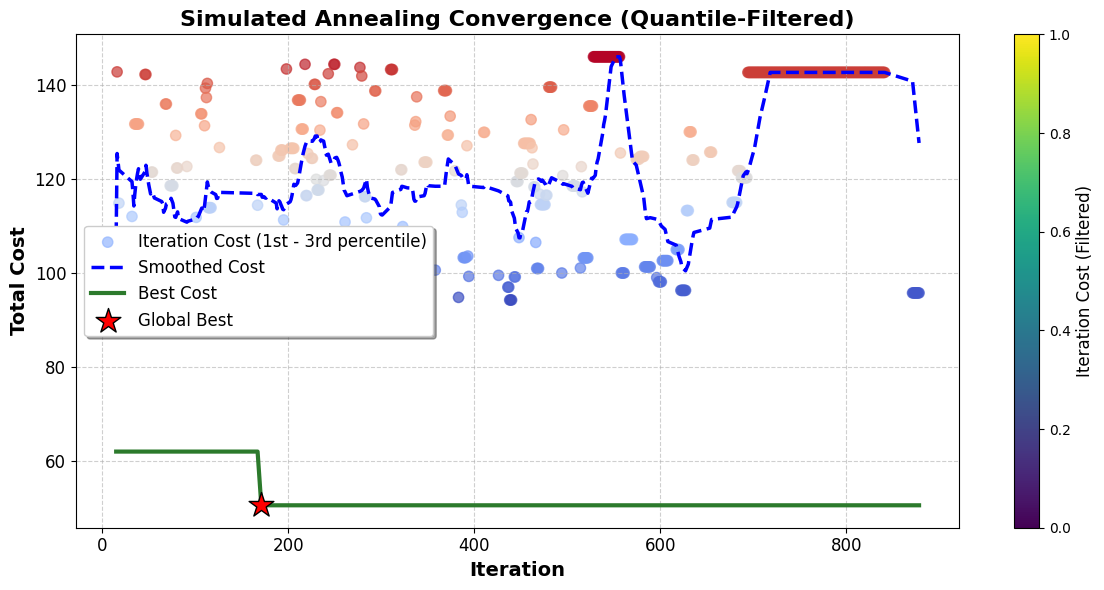

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Extract data
iterations = np.array([h["iteration"] for h in sa_history])
current_costs = np.array([h["iter_cost"]["total_cost"] for h in sa_history])
best_costs = np.array([h["best_cost"]["total_cost"] for h in sa_history])

# Select quantile 1 & 3
lower_q = np.quantile(current_costs, 0.25)
upper_q = np.quantile(current_costs, 0.75)

mask = (current_costs >= lower_q) & (current_costs <= upper_q)

filtered_iterations = iterations[mask]
filtered_costs = current_costs[mask]
best_costs_filtered = best_costs[mask]

# Smooth filtered costs
window = max(1, len(filtered_iterations)//20)
smoothed_current = pd.Series(filtered_costs).rolling(window=window, min_periods=1).mean().values

# Plotting
plt.figure(figsize=(12, 6))

# Scatter (filtered)
plt.scatter(
    filtered_iterations,
    filtered_costs,
    c=filtered_costs,
    cmap="coolwarm",
    s=55,
    alpha=0.7,
    label="Iteration Cost (1st - 3rd percentile)"
)

# Smoothed line from filtered data
plt.plot(
    filtered_iterations,
    smoothed_current,
    color="blue",
    linewidth=2.5,
    linestyle="--",
    label="Smoothed Cost"
)

# Best-so-far line (never filtered — you always want the real best)
plt.plot(
    filtered_iterations,
    best_costs_filtered,
    color="#2C7A2C",
    linewidth=3,
    label="Best Cost"
)

# Highlight global best
best_idx = np.argmin(best_costs_filtered)
plt.scatter(
    filtered_iterations[best_idx],
    best_costs_filtered[best_idx],
    color="red",
    marker="*",
    s=350,
    edgecolor="black",
    zorder=6,
    label="Global Best"
)

# Labels & title
plt.xlabel("Iteration", fontsize=14, fontweight="bold")
plt.ylabel("Total Cost", fontsize=14, fontweight="bold")
plt.title("Simulated Annealing Convergence (Quantile-Filtered)", fontsize=16, fontweight="bold")

# Colorbar
cbar = plt.colorbar()
cbar.set_label("Iteration Cost (Filtered)", fontsize=12)

# Grid, ticks, legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, shadow=True)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract iteration numbers
iterations = np.array([h["iteration"] for h in hybrid_history])

# Extract all whales' costs per iteration
population_costs = [
    [sched.cost["total_cost"] for sched in h["iter_schedule"]] 
    for h in hybrid_history
]

# Compute best-so-far cost per iteration
best_costs = np.array([h["best_cost"]["total_cost"] for h in hybrid_history])

flat_costs_raw = np.array([c for gen in population_costs for c in gen])
flat_iters_raw = np.array([iterations[i] for i, gen in enumerate(population_costs) for _ in gen])

lower_q = np.quantile(flat_costs_raw, 0.25)
upper_q = np.quantile(flat_costs_raw, 0.75)

mask = (flat_costs_raw >= lower_q) & (flat_costs_raw <= upper_q)

# Filtered data
flat_costs = flat_costs_raw[mask]
flat_iters = flat_iters_raw[mask]

# Plotting
plt.figure(figsize=(13, 7))

#Scatter of filtered whale population
scatter = plt.scatter(
    flat_iters,
    flat_costs,
    c=flat_costs,
    cmap="coolwarm",
    s=40,
    edgecolor="k",
    alpha=0.65,
    label="Population Costs (Filtered)"
)

# Overlay best-so-far line
plt.plot(
    iterations,
    best_costs,
    color="green",
    linewidth=3,
    label="Best-so-far Cost",
    zorder=5
)

# Highlight global best
best_idx = best_costs.argmin()
plt.scatter(
    iterations[best_idx],
    best_costs[best_idx],
    marker="*",
    s=350,
    color="red",
    edgecolor="black",
    zorder=6,
    label="Global Best"
)

plt.xlabel("Iteration", fontsize=14, fontweight="bold")
plt.ylabel("Total Cost", fontsize=14, fontweight="bold")
plt.title("WOA Convergence Plot (Filtered by Middle 75% Quantiles)", fontsize=16, fontweight="bold")

cbar = plt.colorbar(scatter)
cbar.set_label("Whale Cost", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=13, shadow=True)
plt.tight_layout()

plt.show()
